Se sospecha que las grandes cantidades de tanino en las hojas maduras de los robles inhiben el  crecimiento de la larva de polilla de invierno (Operophtera bromata L., Geometridae) que daña en  exceso estos árboles en ciertos años. La siguiente tabla enumera el peso promedio de dos muestras  de la larva en los primeros 28 días después de su nacimiento. Mientras la primera muestra se crió
en las hojas jóvenes de roble, la segunda muestra se crió en las hojas maduras.

| Día           |  0   |6    |10    | 13  | 17   | 20    | 28  |
|---------------|------|---- |----  |---- |----- |------ |-----|
| muestra 1(mg) | 6.67 |17.33|42.67 |37.33| 30.10| 29.31 |28.74|
| muestra 2(mg) | 6.67 |16.11|18.89 |15.00| 10.56| 9.44  |8.89 |

1.  Use el ajuste polinomial simple para aproximar la curva de peso promedio para cada muestra.
2. Encuentre un peso promedio máximo aproximado para cada muestra determinando el  máximo del polinomio del ajuste(**use un método de ceros de funciones**)
3. Realice las interpretaciones o conclusiones sobre la sospecha que se tiene sobre el estudio
4. Para la próxima clase cada pareja(**quiz**) debe  presentar un informe sobre la investigación de los polinomios de Lagrange(solo la teoría que la soporta) y la va a exponer(no hay que programar- solo se requiere como se construye, para que sirve, las ventajas y desventajas).

In [35]:
from Interpolacion_Ajuste.MatrizPolinomial.matriz_polinomial import matriz_polinomial
from SistemasEcuacionesLineales.EliminacionGaussiana.EliminacionGaussiana import eliminacion_gaussiana
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

x = sp.Symbol('x')

xdata = np.array([0, 6 ,10, 13, 17, 20, 28])

datos_observados1 = np.array([6.67, 17.33, 42.67, 37.33, 30.10, 29.31, 28.74])
datos_observados2 = np.array([6.67, 16.11, 18.89, 15.00, 10.56, 9.44, 8.89])

coef = eliminacion_gaussiana(matriz_polinomial(xdata), datos_observados1)
print(coef)

coef2 = eliminacion_gaussiana(matriz_polinomial(xdata), datos_observados2)
print(coef2)

polinomio1_simbolico = sum(coef[i]*x**i for i in range(len(coef)))
polinomio1 = lambda x: sum(coef[i]*x**i for i in range(len(coef)))
ux = np.linspace(min(xdata), max(xdata), 100)

polinomio2_simbolico = sum(coef2[i]*x**i for i in range(len(coef2)))
polinomio2 = lambda x: sum(coef2[i]*x**i for i in range(len(coef2)))

[ 6.67000000e+00 -4.26434809e+01  1.61427244e+01 -2.09463908e+00
  1.26902363e-01 -3.67167940e-03  4.09457568e-05]
[ 6.67000000e+00 -5.67820696e+00  2.91280910e+00 -4.13798651e-01
  2.58412834e-02 -7.52546222e-04  8.36159789e-06]


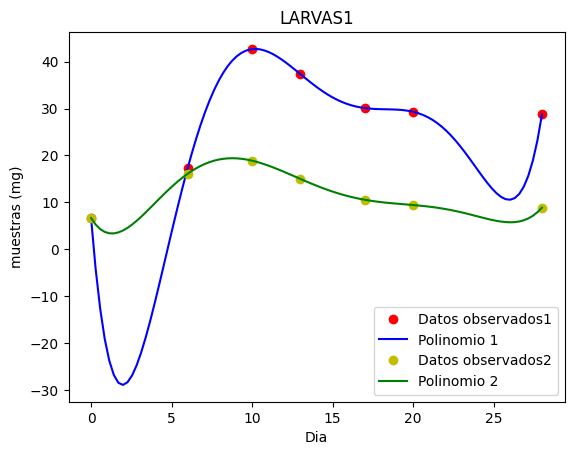

In [34]:
# Graficamos

plt.plot(xdata, datos_observados1, 'ro', label='Datos observados1')
plt.plot(ux, polinomio1(ux), 'b', label='Polinomio 1')


plt.plot(xdata, datos_observados2, 'yo', label='Datos observados2')
plt.plot(ux, polinomio2(ux), 'g', label='Polinomio 2')

plt.xlabel('Dia')
plt.ylabel('muestras (mg)')
plt.title('LARVAS1')
plt.legend()
plt.show()

In [48]:
from CerosDeFunciones.MetodosAbiertos.Newton.newton import newton

X0 = 10
tolerancia = 1e-6
funcion1 = sp.diff(polinomio1_simbolico,x)
funcion2 = sp.diff(polinomio2_simbolico,x)

x1, error, itera = newton(funcion1, X0,tolerancia)
x2, error2, iter2 = newton(funcion2, X0,tolerancia)

print(f"El Dia en que la larva alcanza el peso aproximado para los datos observados 1: {x1}")
print(f"El  Dia en que la larva alcanza el peso aproximado para los datos observados 2: {x2}")
print("\n")

print(f" El peso promedio maximo en miligramos es: {polinomio1(x1)}")
print(f" El peso promedio maximo en miligramos es: {polinomio2(x2)}")


El Dia en que la larva alcanza el peso aproximado para los datos observados 1: 10.1885297651615
El  Dia en que la larva alcanza el peso aproximado para los datos observados 2: 8.76945446591457


 El peso promedio maximo 42.7084211919496
 El peso promedio maximo 19.4157503416048


***Conclusión:***

Después de realizar el ajuste polinomial simple para ambas muestras y calcular el punto máximo aproximado de crecimiento de las larvas:

La muestra 1 (hojas jóvenes) alcanzó un peso promedio máximo de aproximadamente **42.7 mg** en el día **10**, lo que muestra un crecimiento inicial acelerado seguido de una disminución progresiva.

La muestra 2 (hojas maduras) alcanzó un peso promedio máximo de aproximadamente **19.4 mg** en el día **8**, presentando un crecimiento mucho más limitado y una caída rápida en el peso.